# Part I - 201902-fordgobike-tripdata
## by HAMISI CHAI POJJO

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [114]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [115]:
# Loading the Fordgobike dataset
df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')


In [116]:
# Checking the contents of the dataset
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [117]:
# Checking the shape,the datatypes and the total entries of each variable
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


> From the dataset information, some of the variables contain **incorrect datatypes** assigned to them.

In [118]:
# Checking for missing values in the dataset
df_bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> Some columns such as *' start_station_id '*, *' start_station_name '*, *' end_station_id '*, *' end_station_name '*, *' member_birth_year '*  and  *' member_gender '* contain **missing values** .

In [119]:
# checking the descriptive statistics for numeric variables
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


> From the above descriptive analysis, the minimum value in the *' member_birth_year '* column is **1878** which is unrealistic.

In [120]:
# Checking for duplicates
df_bike.duplicated().sum()

0

> There are no duplicates in the dataset.

### Issues In the Dataset.
1. Some variables contained missing values
2. Incorrect Datatypes assigned to the variables.
3. Inaccurate data in some columns.


In [121]:
# Creating a copy of the dataset for cleaning purposes
df_bike1 = df_bike.copy()

In [122]:
df_bike1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Cleaning the Data

#### 1. Missing Values

> In this case, we will delete all the null values in the dataset.

In [123]:
# Deleting all the null values in the dataset
df_bike1.dropna(inplace=True)

#### 2. Changing the Incorrect Datatypes.

In [124]:
# Changing the datatype of the 'start_time' and 'end_time' columns from string to datetime.
from numpy import datetime64
for col in ['start_time', 'end_time']:
    df_bike1[col] = df_bike1[col].astype(datetime64)

In [125]:
# Changing the datatype of 'member_birth_year' column from float to integer. 
df_bike1['member_birth_year'] = df_bike1['member_birth_year'].astype('int64')

In [126]:
# Since 'member_gender', 'user_type' and 'bike_share_for_all_trip' is a nominal categorical data, we shall change it to a categorical datatype.
for col in ['member_gender', 'user_type', 'bike_share_for_all_trip']:
    df_bike1[col] = df_bike1[col].astype('category')

In [127]:
# Confirming if the datatypes are corrected
df_bike1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
dtypes: category(3), datetime64[ns](2), float64(6), int64(3), ob

#### 3. Inaccurate values in some columns

>In our analysis we shall deal with members born less than 100 years ago.
We shall find the Age by subtracting from 2019 since it was the year the data was extracted.
Since we have found that one member was born in 1878 which sounds unrealist, lets see how many members were born before 1919 of the ***member_birth_year*** column.

In [128]:
# Locating members born less than 100 years ago.
df_bike1.loc[df_bike1['member_birth_year'] <= 1919 ]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900,Male,No
16087,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900,Male,No
19375,641,2019-02-26 17:03:19.855,2019-02-26 17:14:01.619,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900,Male,No
21424,1424,2019-02-26 08:58:02.904,2019-02-26 09:21:47.749,375.0,Grove St at Masonic Ave,37.774836,-122.446546,343.0,Bryant St at 2nd St,37.783172,-122.393572,5344,Subscriber,1900,Male,No
21506,701,2019-02-26 09:06:11.239,2019-02-26 09:17:52.442,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,9.0,Broadway at Battery St,37.798572,-122.400869,5337,Customer,1900,Male,No
24042,194,2019-02-25 18:58:10.644,2019-02-25 19:01:25.308,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,6363,Subscriber,1900,Male,Yes
26133,410,2019-02-25 13:38:12.067,2019-02-25 13:45:02.207,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,176.0,MacArthur BART Station,37.828410,-122.266315,3311,Subscriber,1900,Male,Yes
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878,Female,No
27675,1087,2019-02-25 09:10:39.549,2019-02-25 09:28:46.676,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,5250,Subscriber,1900,Male,No


In [129]:
# Deleting all the values less than 1900 on the 'member_birth_year' column.
df_bike1 = df_bike1.drop(df_bike1[df_bike1.member_birth_year <= 1919].index)

In [130]:
# Let's find the age of the members of the bike sharing system.
# We shall use 2019 because it was the year when this data was extracted.

df_bike1['Age'] = 2019 - df_bike1['member_birth_year']

In [131]:
# Confirming if the row is deleted.
df_bike1.loc[ df_bike1['member_birth_year'] <= 1919]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age


#### Adding New Columns and Dropping Some Columns.

In [132]:
# Let's calculate the distance in Kilometers from the two stations based on latitude and longitudes.

from math import sin, cos, sqrt, atan2, radians
def calculate_distance(start_station_latitude,start_station_longitude , end_station_latitude, end_station_longitude):
    R = 6373

    start_station_latitude = radians(start_station_latitude)
    start_station_longitude = radians(start_station_longitude)
    end_station_latitude = radians(end_station_latitude)
    end_station_longitude = radians(end_station_longitude)

    dist_longitude = end_station_longitude - start_station_longitude
    dist_latitude = end_station_latitude - start_station_latitude

    a = sin(dist_latitude / 2)**2 + cos(start_station_latitude) * cos(end_station_latitude) * sin(dist_longitude / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [133]:
# Let's create a new column called Distance.
df_bike1['distance'] = [calculate_distance(**df_bike1[['start_station_latitude' , 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']].iloc[i].to_dict()) for i in range(df_bike1.shape[0])]

> Now let's drop the columns: 'start_station_latitude', 'start_station_longitude', 'end_station_latitude' and 'end_station_longitude'

In [134]:
# Deleting the columns.
df_bike1.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], inplace=True)

Lets extract ***Day_name*** and ***hour*** from the start time and end time column to create new columns.
From start time we create: start_day and start_hour column.
From end_time we craete: end_day and  end_hour column.

In [135]:
# Creating start_day and start_hour column from start_time column.
import datetime as dt

df_bike1['start_day']= df_bike1['start_time'].dt.day_name()
df_bike1['start_hour']= df_bike1['start_time'].dt.hour

In [136]:
# Creating end_day and end_hour column from end_time column.
import datetime as dt

df_bike1['end_day']= df_bike1['end_time'].dt.day_name()
df_bike1['end_hour']= df_bike1['end_time'].dt.hour

In [137]:
# Changing duration from seconds to minutes.
df_bike1['duration_min']= df_bike1['duration_sec']/60

After extracting the Day_name , duration_min and hour variables, we shall drop the ***start_time*** , ***duration sec*** and ***end_time*** columns.

In [138]:
# Deleting the columns
df_bike1.drop(columns=['start_time','end_time','duration_sec'], inplace= True)

In [139]:
# Let's rearrange the columns to follow a specific order as indicated
df_bike1 = df_bike1[['start_station_id','start_station_name','start_day','start_hour','end_station_id','end_station_name','end_day','end_hour','duration_min','distance','bike_id','user_type','member_birth_year','Age','member_gender','bike_share_for_all_trip']]

In [140]:
# Confirming the changes.
df_bike1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174880 entries, 0 to 183411
Data columns (total 16 columns):
start_station_id           174880 non-null float64
start_station_name         174880 non-null object
start_day                  174880 non-null object
start_hour                 174880 non-null int64
end_station_id             174880 non-null float64
end_station_name           174880 non-null object
end_day                    174880 non-null object
end_hour                   174880 non-null int64
duration_min               174880 non-null float64
distance                   174880 non-null float64
bike_id                    174880 non-null int64
user_type                  174880 non-null category
member_birth_year          174880 non-null int64
Age                        174880 non-null int64
member_gender              174880 non-null category
bike_share_for_all_trip    174880 non-null category
dtypes: category(3), float64(4), int64(5), object(4)
memory usage: 19.2+ MB


In [141]:
# lets check our dataset
df_bike1.head()

,start_station_id,start_station_name,start_day,start_hour,end_station_id,end_station_name,end_day,end_hour,duration_min,distance,bike_id,user_type,member_birth_year,Age,member_gender,bike_share_for_all_trip
0,21.0,Montgomery St BART Station (Market St at 2nd St),Thursday,17,13.0,Commercial St at Montgomery St,Friday,8,869.750000,0.544879,4902,Customer,1984,35,Male,No
2,86.0,Market St at Dolores St,Thursday,12,3.0,Powell St BART Station (Market St at 4th St),Friday,5,1030.900000,2.705394,5905,Customer,1972,47,Male,No
3,375.0,Grove St at Masonic Ave,Thursday,17,70.0,Central Ave at Fell St,Friday,4,608.166667,0.260820,6638,Subscriber,1989,30,Other,No
4,7.0,Frank H Ogawa Plaza,Thursday,23,222.0,10th Ave at E 15th St,Friday,0,26.416667,2.410058,4898,Subscriber,1974,45,Male,Yes
5,93.0,4th St at Mission Bay Blvd S,Thursday,23,323.0,Broadway at Kearny,Friday,0,29.883333,3.333249,5200,Subscriber,1959,60,Male,No


> 

### What is the structure of your dataset?

> There are 174951 entries in the tripdata dataset with 16 features (start_station_id, start_station_name, start_day, start_hour, end_station_id, end_station_name, end_day, end_hour, duration_sec, distance, bike_id, user_type, member_birth_year, Age, member_gender, bike_share_for_all_trip). The variables are distributed as follows according to the data type: Categorical(nominal) 3, Float 3, Integers 6 and Strings 4. 
### What is/are the main feature(s) of interest in your dataset?

> My main features of interest is the distance covered and trip duiration and the factors affecting it.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect age, gender, user type, start_day as well as sharing of bike be an affecting factor of trip duration and distance covered.
 

## Univariate Exploration



##### 1. How are the user type distributed among the riders?

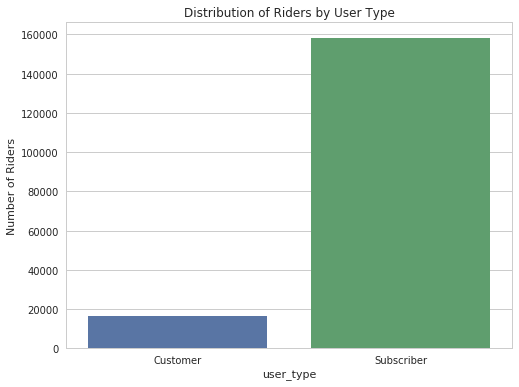

In [142]:
# Plotting the distribution of Riders by User Type
plt.figure(figsize=(8,6))
sb.set(style="whitegrid")
ax=sb.countplot(data =df_bike1, x='user_type').set(title=('Distribution of Riders by User Type'))
plt.ylabel('Number of Riders');


> Majority of the bike users are subscribers, taking around a count of 150000 while customners taking the least count with bike users being less than 20000.

##### 2. What is the Distribution of the Members Age?

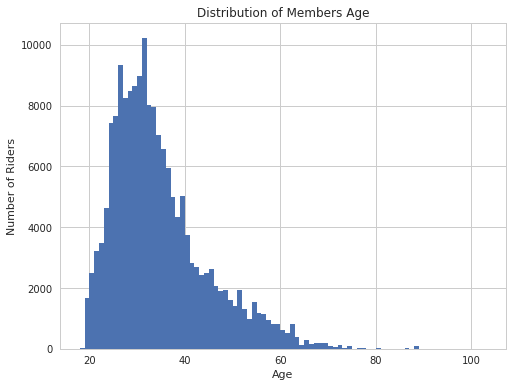

In [143]:
# Finding the distribution 0f the 'Age' column.
steps = np.arange(df_bike1['Age'].min() , df_bike1['Age'].max()+5, 1);
plt.figure(figsize=(8,6))
plt.hist(data=df_bike1, x='Age', bins=steps)
plt.xlabel('Age')
plt.ylabel('Number of Riders')
plt.title('Distribution of Members Age')
plt.show();

> The Age Distribution is Right Skewed, with majority of the members ranging from 30 to 40 years. The graph takes a steady rise from 20 years upto the peak at around 35 years and takes a steady fall upto 80 years, with a few number of individuals of 90 years.

##### 3. How are the members genders distributed across the population?

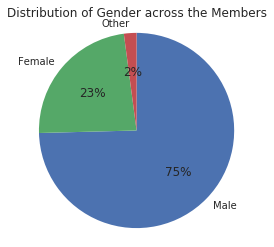

In [144]:
# Checking how gender is distributed among the members.
sorted_counts=df_bike1['member_gender'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index,startangle= 90, counterclock=False, autopct='%.0f%%');
plt.axis('square')
plt.title('Distribution of Gender across the Members');

> Majority of the members are male, taking 75% of the population, followed by the female who take 23% and those who specified other take 2% of the population.

In [145]:
# Lets first order the Days of the week and hours of the days in its coherent order.
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_bike1[var] = df_bike1[var].astype(ordered_var)


##### 4. Which day has highest and least numbers of bike riders.?

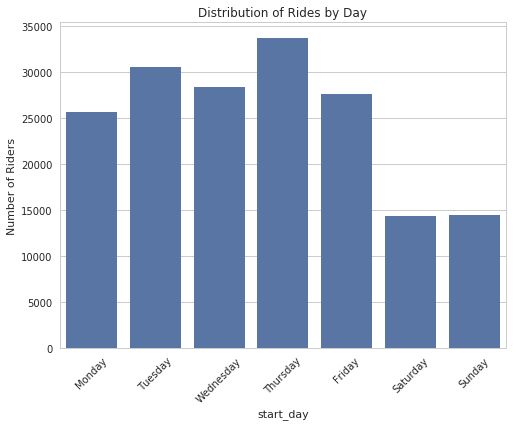

In [146]:
# Plotting the distribution of Riders by Day.
plt.figure(figsize=(8,6))
sb.countplot(data =df_bike1, x='start_day', color=sb.color_palette()[0]).set(title='Distribution of Rides by Day');
plt.ylabel('Number of Riders')
plt.xticks(rotation=45);

> Weekdays of the week recorded high number of riders accounting over 25000 riders as compared to weekends which recorded least number of riders.  Thursday recorded the highest number of riders comparatively with over 32000 riders while Saturday and Sunday recorded the least riders altogether.

##### 5. What is the Hourly Distribution of Bike Hiring?

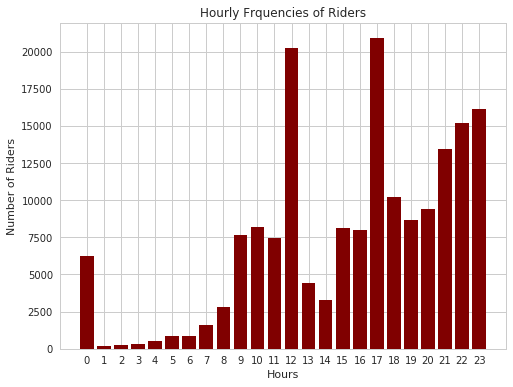

In [147]:
# Plotting hourly distribution of bike hrirng.
x=df_bike1['start_hour'].unique()
y=df_bike1['start_hour'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(x,y, color='maroon')
plt.xticks(np.arange(0,24,1))
plt.xlabel('Hours')
plt.ylabel('Number of Riders')
plt.title('Hourly Frquencies of Riders');

> Most riders were available in the morning hours (from 9th and 11th hours) and evening hours (from 15th hour upto 23rd hour),.  There is a drop in the number of riders 13th and 14th hours. The 17th hour recorded the highest frequency while 12th hour had the second highest frequency. Past midnight (from 1am to 8am ) had the least number of riders. This trend can be attributed by the fact that most people are mostly free in the evening hours.

##### 6. How many members shared their bike during the trip?

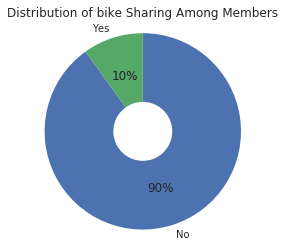

In [148]:
# Plotting distribution of bike sharing during the trip.
shared=df_bike1['bike_share_for_all_trip'].value_counts()
plt.pie(shared, labels=shared.index,startangle= 90, wedgeprops={'width':0.7}, counterclock=False, autopct='%.0f%%');
plt.axis('square')
plt.title('Distribution of bike Sharing Among Members');

> Most members (90% ) of the riders did not share their bikes during the trip, only 10% of the riders shared their bikes during the ride.

##### 7. What is the Distribution of the distance covered by bikers?

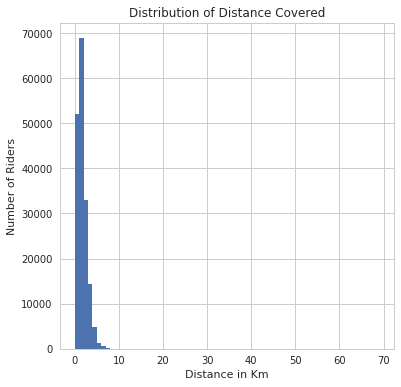

In [149]:
# Finding the distribution 0f the distance covered by the riders.
plt.figure(figsize=(6,6))
steps = np.arange(df_bike1['distance'].min() , df_bike1['distance'].max()+0.5, 1);
plt.hist(data=df_bike1, x='distance', bins=steps)
plt.xlabel('Distance in Km')
plt.ylabel('Number of Riders')
plt.title('Distribution of Distance Covered')
plt.show();

> Most of the data is set to the far left of their axes, suggesting some strong outliers on the right. We'll take a deep look in the data to identify these outliers. 

In [150]:
# Lets identify the outliers found on the distance variable.
# We shall start from the 20th Km onwards to identify how many outliers are there.
df_bike1.loc[ df_bike1['distance'] >=20]

,start_station_id,start_station_name,start_day,start_hour,end_station_id,end_station_name,end_day,end_hour,duration_min,distance,bike_id,user_type,member_birth_year,Age,member_gender,bike_share_for_all_trip
112038,21.0,Montgomery St BART Station (Market St at 2nd St),Tuesday,14,300.0,Palm St at Willow St,Tuesday,16,115.75,69.491049,4780,Subscriber,1985,34,Female,No


In [151]:
# Since it is only one outlier identified, we shall drop the row
df_bike1 = df_bike1.drop(index=112038)

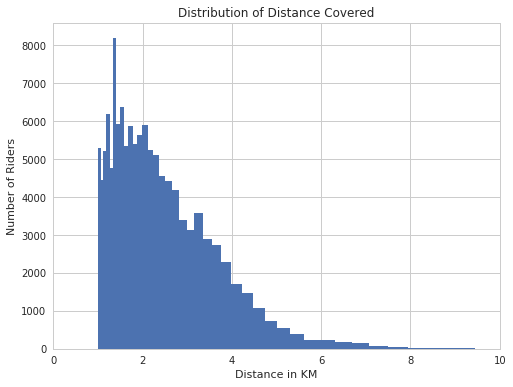

In [152]:
# Lets use log to plot the distribution of distance
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_bike1['distance'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df_bike1, x = 'distance', bins = bins)
plt.xlim([0, 10])
plt.xlabel('Distance in KM')
plt.ylabel('Number of Riders')
plt.title('Distribution of Distance Covered')
plt.show()

The graph takes a right skewed distribution, with majority (over 1000 riders) of the riders covering less than 4Km. The distance covered by most(over 3600) riders was around 1.5 km to 3.5 km.

##### 8. What is the distribution of Time spent during the Trip? 

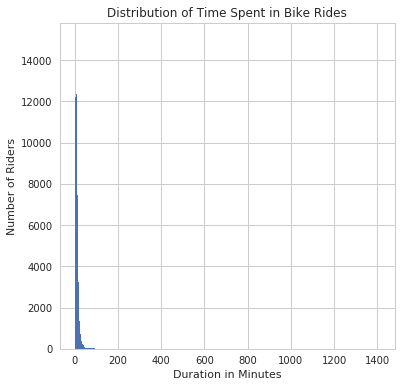

In [153]:
# Finding the distribution 0f the distance covered by the riders.
plt.figure(figsize=(6,6))
steps = np.arange(df_bike1['duration_min'].min() , df_bike1['duration_min'].max()+0.5, 1);
plt.hist(data=df_bike1, x='duration_min', bins=steps)
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of Riders')
plt.title('Distribution of Time Spent in Bike Rides')
plt.show();

> The graph is highly concentrated opn the left side, proving there is a large number of outliers extending far right of the graph. We shall identify the outliers before and discard them.

In [154]:
# From the graph, we can identify that most of the minutes range from 0th minute to around 120th minute.
# Lets locate all the minutes greater than 120.
df_bike1.loc[ df_bike1['duration_min'] >120]

,start_station_id,start_station_name,start_day,start_hour,end_station_id,end_station_name,end_day,end_hour,duration_min,distance,bike_id,user_type,member_birth_year,Age,member_gender,bike_share_for_all_trip
0,21.0,Montgomery St BART Station (Market St at 2nd St),Thursday,17,13.0,Commercial St at Montgomery St,Friday,8,869.750000,0.544879,4902,Customer,1984,35,Male,No
2,86.0,Market St at Dolores St,Thursday,12,3.0,Powell St BART Station (Market St at 4th St),Friday,5,1030.900000,2.705394,5905,Customer,1972,47,Male,No
3,375.0,Grove St at Masonic Ave,Thursday,17,70.0,Central Ave at Fell St,Friday,4,608.166667,0.260820,6638,Subscriber,1989,30,Other,No
199,28.0,The Embarcadero at Bryant St,Thursday,18,368.0,Myrtle St at Polk St,Thursday,22,252.050000,2.777802,5380,Subscriber,1980,39,Male,No
297,19.0,Post St at Kearny St,Thursday,18,19.0,Post St at Kearny St,Thursday,22,217.683333,0.000000,5830,Subscriber,1987,32,Male,No
511,266.0,Parker St at Fulton St,Thursday,19,201.0,10th St at Fallon St,Thursday,21,123.683333,7.208482,6001,Subscriber,1975,44,Male,Yes
779,58.0,Market St at 10th St,Thursday,10,375.0,Grove St at Masonic Ave,Thursday,20,603.166667,2.571395,5465,Subscriber,1991,28,Female,No
813,241.0,Ashby BART Station,Thursday,17,248.0,Telegraph Ave at Ashby Ave,Thursday,20,166.566667,0.993453,6411,Subscriber,1968,51,Female,No
939,5.0,Powell St BART Station (Market St at 5th St),Thursday,15,70.0,Central Ave at Fell St,Thursday,20,280.066667,3.364405,6501,Customer,1974,45,Male,No
945,5.0,Powell St BART Station (Market St at 5th St),Thursday,15,70.0,Central Ave at Fell St,Thursday,20,279.466667,3.364405,2464,Customer,1974,45,Male,No


In [155]:
# Deleting all the values greater than 120 on the 'duration_min' column.
df_bike1 = df_bike1.drop(df_bike1[df_bike1.duration_min >120].index)

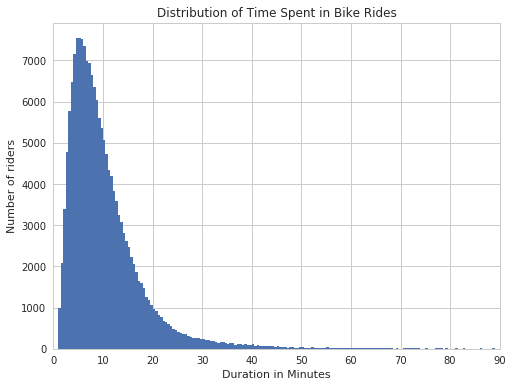

In [156]:
# Finding the distribution 0f the distance covered by the riders.
plt.figure(figsize=(8,6))
steps = np.arange(df_bike1['duration_min'].min() , df_bike1['duration_min'].max()+0.5, 0.5);
plt.hist(data=df_bike1, x='duration_min', bins=steps)
plt.xlim([0,90])
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of riders')
plt.title('Distribution of Time Spent in Bike Rides')
plt.show();

> The duration variable takes a right skewed distribution, taking a steep rise from 0th min upto its peak at the 10th minute with majority of the riders (over 7000) averaging 10 minutes. Th graph takes a steep fall upto the 50th minute and takes a linear distribution upto the 80th minute.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> The distribution of age had a longer tail with some members 
> The distance variable had a shorter range when we plotted it. So I used the log transform to make sure it fits on the given scale. After the transformation, the data took a right skewed distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. In the member birth year variable, the column had unrealist birth years, I had a case of a member whose birth year was in 1878 . I had to adjust the data to show only the members who are less than 100 years and drop all members with more than 100 years.
> 2. The distance and duration in minutes variable had a long tail towards the right side of the graph, indicating a wide range of outliers.I adjusted the data by dropping the rows containing the outliers. 


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

##### 9. What is the relationship between between the distance covered and the duration in minutes

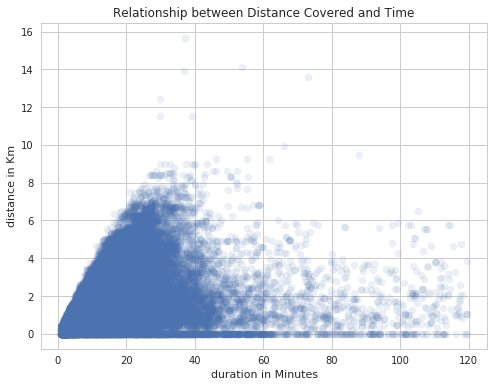

In [157]:
#Lets see the relationship between distance covered and the duration of the Trip.

plt.figure(figsize=(8,6)) # Specifying the size of the plot
plt.scatter(data=df_bike1, y='distance', x='duration_min',alpha =1/10)
plt.title('Relationship between Distance Covered and Time')
plt.xlabel('duration in Minutes')
plt.ylabel('distance in Km');

> There is a slight positive correlation between the distance covered and the time taken by the rider. This is attributed by increase in distance leads to increase duration. However,correlation does not imply causation, in a sense that some riders might spend a long time with the bikes and yet cover less distance or vice versa.

##### 10. How is Sharing of Bike distributed Among the Members Gender?

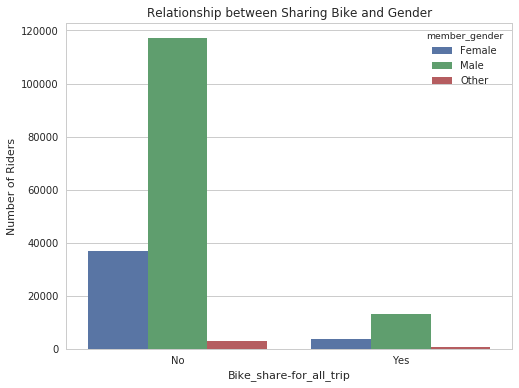

In [158]:
#Lets see how each gender shared their bikes during the trip.

plt.figure(figsize=(8,6))
sb.countplot(data=df_bike1, x='bike_share_for_all_trip', hue='member_gender');
plt.title('Relationship between Sharing Bike and Gender')
plt.xlabel('Bike_share-for_all_trip')
plt.ylabel('Number of Riders');

> From the graph, most members did not share their bike during their trips, with majority of them being male taking over 110000, with ladies who didn't share their bikes being around 40000.Members who specified their gender as other and didn't share their bikes were around 5000.

>The members who shared their bikes during the trip recorded a low count with the male gender still with the highest count of around 10000, the female followed with a count of around 5000 and the members who specified their gender as other recorded a low of around 1000. 


##### 11. Is Sharing a bike a Factor in Covering the Longest Distance?

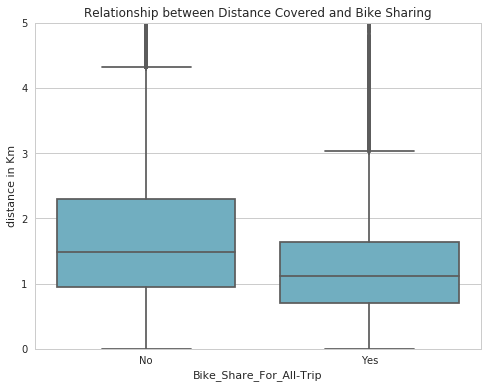

In [159]:
# Lets see how distance covered and is related to bike sharing.

plt.figure(figsize=(8,6))
sb.boxplot(data=df_bike1, x='bike_share_for_all_trip', y='distance', color=sb.color_palette()[5])
plt.ylim([0,5])
plt.title('Relationship between Distance Covered and Bike Sharing')
plt.xlabel('Bike_Share_For_All-Trip')
plt.ylabel('distance in Km');

> From the graph, members who didn't share their bikes during the trip dispalyed a slight positive skew recording a maximum distance of around 4.5KM with a median of around 1.5KM.  The members who did share their bike dispalyed a normal distribution recording  a maximum of around 3KM and a median of around 1.25KM. 

##### 12. What is the Distribution of Trip Starting hour across the Days of the Week?

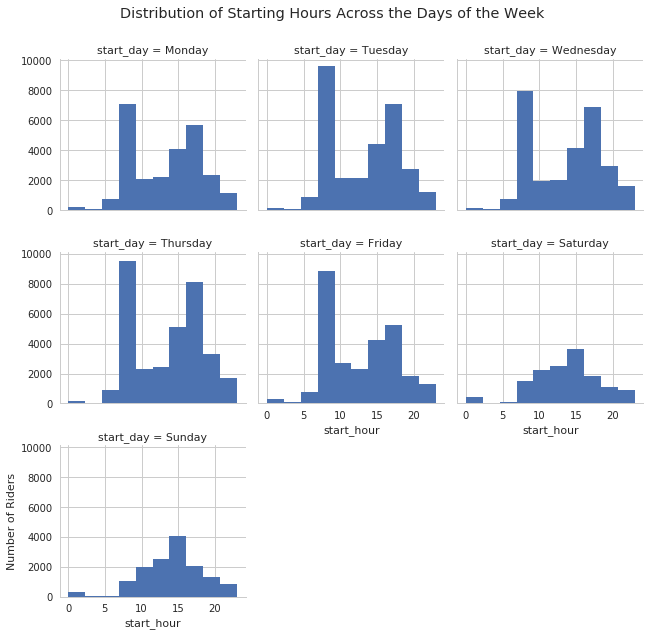

In [160]:
# Lets see how Bike sharing is distributed across the hours of the day on a week.

g=sb.FacetGrid(data= df_bike1,col='start_day', col_wrap=3);
g.map(plt.hist, 'start_hour')
plt.ylabel('Number of Riders')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Starting Hours Across the Days of the Week');

>From the general view of the graph, Weekdays(Monday to Friday) recorded a higher count of riders as compared to Weekends(Saturday and Sunday). From Monday to Friday, the graphs takes a bimodal distribution with the highest peak hours being around the morning (7am -9am), there is a drop in numbers of riders from 10am to around 2pm, the second peak starts in the afternoon hours from 2pm to 6pm.
> During the weekends, Saturday and Sunday the graphs take a unimodal distribution starting from morning hours(7am -2pm) with peak hours being in the afternoon at around 3pm and drops from (4pm - 11pm)

##### 13. Which Day of the Week Averaged More Riding Minutes?

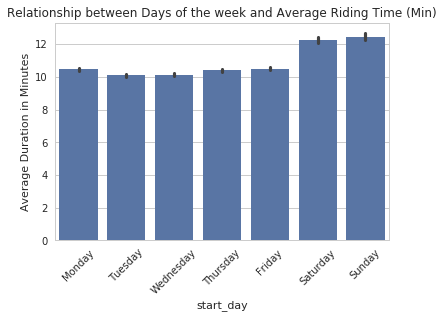

In [161]:
# Lets see the trip minutes averaged across the days of the week.

sb.barplot(data=df_bike1, x='start_day', y='duration_min', color=sb.color_palette()[0])
plt.xticks(rotation=45)
plt.ylabel('Average Duration in Minutes')
plt.title('Relationship between Days of the week and Average Riding Time (Min)');

>The weekends, both Saturday and Sunday had a higher average(around 12 Minutes)on the riding duration. Weekdays (From Monday to Friday) recorded a lower average, all days with less than 11 Minutes. This can be attributed to the fact that on weekends more members are free from any Work duties.

##### 14. What is the Average Age With Respect to Member gender?

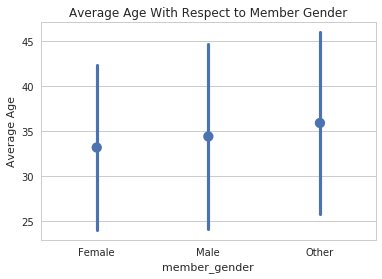

In [162]:
# Lets see the average age of each member 

sb.pointplot(data=df_bike1,x='member_gender' ,y='Age', ci='sd', linestyles=" ");
plt.ylabel('Average Age')
plt.title('Average Age With Respect to Member Gender');

> Members recorded as Female averaged around 33 years, the Male members averaged around 35 years and those who specified as other averaged around 36 years. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As i had expected, the weekends(Saturday and Sunday) the trips averaged more duration minutes than weekdays(Monday to Friday) due to the fact that most people are not busy working.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I expected members who shared the bike cover more distance as compared to the members who didn't share their bikes during the trip, Interestingly Members who didn't share their bikes covered the most distance. 


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

##### 15. What is the Relationship Between Bike share, User Type and the Average Distance Covered?

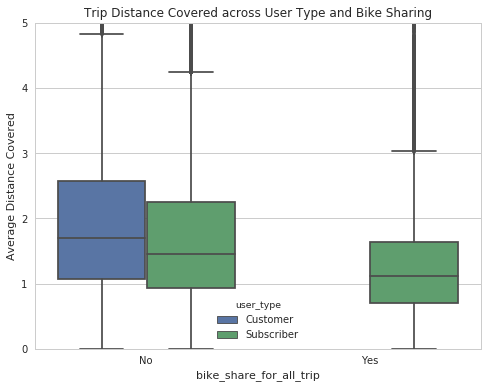

In [163]:
# Lets see the relationship between the three variables: distance, user type and bike sharing.

plt.figure(figsize=(8,6));
sb.boxplot(data=df_bike1, x='bike_share_for_all_trip', y='distance', hue='user_type')#, linestyles=" ")
plt.ylim(0,5)
plt.title('Trip Distance Covered across User Type and Bike Sharing')
plt.ylabel('Average Distance Covered');

> From the visualization, the customers didn't share their bikes during the trip and averaged around 1.7KM. Meanwhile the subscribers both shared and didn't share their bikes during the trip. The subscribers who shared the their bikes Averaged 1.3KM whilke those who didn't share the bikes averaged Around 1.5KM.

##### 16. How is gender and user type Affecting the trip duration?

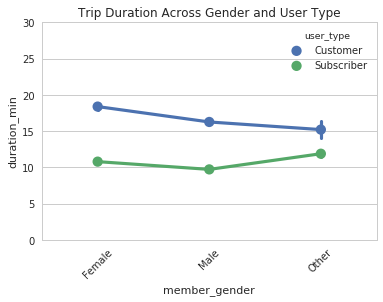

In [164]:
# Lets plot the point plot to see the relationship between duration, gender and user type.
sb.pointplot(data=df_bike1, x='member_gender', y= 'duration_min', hue='user_type').set(title='Trip Duration Across Gender and User Type')
plt.ylim(0,30)
plt.xticks(rotation=45);

> Majority of the customers were female who averaged around 18 minutes during the trip, which is the most as compared to male customers who averaged around 16 minutes and lastly customers who specified other who averaged around 15 minutes.
Interestingly, subscribers who specified themselevs as other averaged 13 minutes during the trip, followed by female subscribers who averaged around 11 minutes and lastly male subscribers who averaged around 10 Minutes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between the Member gender and user type provided a clear picture that females generally averaged the most duration minutes as compared to the other genders. This was something which could not be easily be identified.

### Were there any interesting or surprising interactions between features?

> Yes, Interestingly male recorded about 75% of the riders population yet females averaged more trip durations than male.

## Conclusions
>Below is a summary of the main findings and reflect on the steps taken during the data exploration.

Data Exploration

> I extracted distance from the the stations longitude and latitude.

> The trip duration was in seconds, so i changed it into minutes by dividing by 60.

> I worked with members from 100 years and below, thus calculated the members age by subtracting from 2019 (the time the data was extracted)

Main findings
> Most trips were taken during Tuesdays and Thursdays while weekends had the least number of trips recorded.

> Riders who didint share their bikes during the trip averaged more distance than those who shared their bikes.

> The average distance covered for all the trip is about 1.7KM.

> The Male counterparts were the majority of the riders (75%) with the females 23% and others trailing at 2%.

>During the weekdays,the morning hours (8-9 hours) and evening hours ; going to work in the morning (8 and 9 hrs) and closing in the evening (17 and 18 hrs) have the highest trip records

> Only subscribers can share their bikes during the trip.

> Customers averaged more durations during the trip than subscribers.

> Gender is among the factors that affected trip durations, where females spent more time with the bikes than Males.

> The day of the week is also a factor on trip durations since trip durations on weekends are longer than on other weekdays







